In [16]:
import pandas as pd
import numpy as np
import pandas as pd, matplotlib.pyplot as plt, time
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import sqlalchemy 
import psycopg2

,cluster,weekdayindex,day,hour,time,violationdescription,percent,globalpercent,result,lat_min,long_min,lat_max,long_max,geog,geogmax
0,3938,2,Wednesday,10,10:00,NO PARK/STREET CLEAN,0.125000,0.224841,0.56,34.044641,-118.320096,34.045449,-118.318737,0101000020E610000026E5EE737C945DC0C6F274CFB605...,0101000020E6100000FBE0213166945DC065E63C42D105...
1,4851,4,Friday,13,1:00 P,METER EXP.,0.052632,0.094299,0.56,34.099761,-118.332467,34.099761,-118.332467,0101000020E6100000F3FFAA2347955DC04835ECF7C40C...,0101000020E6100000F3FFAA2347955DC04835ECF7C40C...
2,4184,4,Friday,12,12:00,NO PARK/STREET CLEAN,0.125000,0.219369,0.57,34.084608,-118.285246,34.084609,-118.284957,0101000020E6100000BB13477941925DC03ADDC36FD40A...,0101000020E6100000ABD106BB3C925DC052CBFF79D40A...
3,28,0,Monday,13,1:00 P,OFF STR/OVERTIME/MTR,0.083333,0.144231,0.58,33.782415,-118.281029,33.782415,-118.281029,0101000020E6100000910E0F61FC915DC02EDE553026E4...,0101000020E6100000910E0F61FC915DC02EDE553026E4...
4,394,1,Tuesday,8,8:00 A,NO PARK/STREET CLEAN,0.166667,0.289382,0.58,33.971602,-118.425383,33.971978,-118.423219,0101000020E61000008330B77B399B5DC07DCF27765DFC...,0101000020E6100000EF022505169B5DC03B376DC669FC...
5,960,1,Tuesday,12,12:00,NO PARK/STREET CLEAN,0.142857,0.245431,0.58,34.244535,-118.444585,34.251231,-118.437001,0101000020E61000007D321015749C5DC0C7DEE6E84C1F...,0101000020E61000009953B8D4F79B5DC03F38E1562820...
6,2865,1,Tuesday,8,8:00 A,NO PARK/STREET CLEAN,0.166667,0.289382,0.58,34.167288,-118.464983,34.167289,-118.464438,0101000020E61000002B6DCC46C29D5DC0E246E3B36915...,0101000020E61000006CC0D65BB99D5DC082923CB66915...
7,5534,0,Monday,16,4:00 P,METER EXP.,0.047619,0.081843,0.58,34.052395,-118.246677,34.052395,-118.246677,0101000020E61000003AEB538EC98F5DC0A9BC1DE1B406...,0101000020E61000003AEB538EC98F5DC0A9BC1DE1B406...
8,2557,3,Thursday,14,2:00 P,METER EXP.,0.055556,0.093860,0.59,34.147812,-118.378977,34.147812,-118.378977,0101000020E6100000B59B2A2941985DC0345A5881EB12...,0101000020E6100000B59B2A2941985DC0345A5881EB12...
9,3131,0,Monday,8,8:00 A,NO PARK/STREET CLEAN,0.166667,0.275908,0.60,33.944590,-118.290524,33.947872,-118.286943,0101000020E6100000CA0C65F297925DC0E801C156E8F8...,0101000020E61000003B342C465D925DC0A565A4DE53F9...


In [21]:
valtest= pd.read_csv('test_validation_data.csv')


In [22]:
valtest.head(10)

,ticketnumber,make,bodystyle,color,location,route,agency,violationcode,violationdescription,fineamount,issuetime,dt_issuednew,issuedatenew,issueyear,weekday,month,newlat,newlong,hour,test_labs
0,4324967872,CHEV,PA,WT,1400 WATSON AVE,568,55,80.56E4+,RED ZONE,93,9:40:00,2/1/18 9:40,2/1/18,2018,3,2,33.792493,-118.248201,9,0
1,4324967894,CHEV,PA,OR,1717 253RD ST,568,55,80.73.2,EXCEED 72HRS-ST,68,13:24:00,2/1/18 13:24,2/1/18,2018,3,2,33.794758,-118.308120,13,0
2,4325060390,DODG,PA,SL,603 ISLAND AVE,500,55,80.56E4+,RED ZONE,93,20:09:00,2/9/18 20:09,2/9/18,2018,4,2,33.776891,-118.266120,20,0
3,4325060552,NISS,PA,SL,1203 C ST W,500,55,80.56E4+,RED ZONE,93,19:50:00,2/11/18 19:50,2/11/18,2018,6,2,33.771941,-118.276204,19,0
4,4325061790,NISS,PA,RD,619 BROAD AVE,500,55,22500E,BLOCKING DRIVEWAY,68,16:58:00,2/26/18 16:58,2/26/18,2018,0,2,33.777413,-118.260906,16,0
5,4325061801,NISS,PA,BK,1351 DRUMM AVENUE,500,55,80.56E4+,RED ZONE,93,18:05:00,2/26/18 18:05,2/26/18,2018,0,2,33.792092,-118.243950,18,0
6,4325061812,HOND,PA,BK,1351 DRUMM AVENUE,500,55,80.56E4+,RED ZONE,93,18:07:00,2/26/18 18:07,2/26/18,2018,0,2,33.792092,-118.243950,18,0
7,4325061845,TOYT,PA,BK,948 BAY VIEW AVE,500,55,80.56E4+,RED ZONE,93,19:10:00,2/26/18 19:10,2/26/18,2018,0,2,33.782368,-118.270099,19,0
8,4325061856,TOYT,PA,BK,948 BAY VIEW AVE,500,55,5200,DISPLAY OF PLATES,25,19:10:00,2/26/18 19:10,2/26/18,2018,0,2,33.782368,-118.270099,19,0
9,4325061941,TOYT,PA,GY,428 F ST W,500,55,80.56E4+,RED ZONE,93,22:15:00,2/26/18 22:15,2/26/18,2018,0,2,33.776841,-118.266486,22,0


In [23]:
#get only the columns you need
validate=valtest[['ticketnumber', 'violationdescription', 'issuetime', 'weekday', 'newlat', 'newlong', 'test_labs']]

In [24]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55703 entries, 0 to 55702
Data columns (total 7 columns):
ticketnumber            55703 non-null int64
violationdescription    55703 non-null object
issuetime               55703 non-null object
weekday                 55703 non-null int64
newlat                  55703 non-null float64
newlong                 55703 non-null float64
test_labs               55703 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 3.0+ MB


In [25]:
testsample=validate.sample(100)

In [7]:
trainSample=pd.read_csv("trainSampleforValidation.csv")

In [26]:
testsample.head()

,ticketnumber,violationdescription,issuetime,weekday,newlat,newlong,test_labs
42922,4325696141,METER EXP.,11:28:00,4,34.099529,-118.289180,69
51236,4326097285,RED ZONE,12:09:00,0,34.043798,-118.258315,74
32478,4326505444,NO PARK/STREET CLEAN,11:05:00,3,34.075540,-118.258108,50
55527,4326463665,STOP/STAND PROHIBIT,15:57:00,5,34.054081,-118.259462,75
47073,4325199782,YELLOW ZONE,12:17:00,5,34.042147,-118.259682,74


In [27]:
testsample['testORtrain']= 'TEST_SET'


In [28]:
test=testsample[['violationdescription', 'weekday', 'issuetime', 'newlat', 'newlong', 'testORtrain']]

In [35]:
test.columns = ['Description', 'Day', 'Time', 'Latitude', 'Longitude', 'Sample']

In [36]:
test.head()

,Description,Day,Time,Latitude,Longitude,Sample
42922,METER EXP.,4,11:28:00,34.099529,-118.289180,TEST_SET
51236,RED ZONE,0,12:09:00,34.043798,-118.258315,TEST_SET
32478,NO PARK/STREET CLEAN,3,11:05:00,34.075540,-118.258108,TEST_SET
55527,STOP/STAND PROHIBIT,5,15:57:00,34.054081,-118.259462,TEST_SET
47073,YELLOW ZONE,5,12:17:00,34.042147,-118.259682,TEST_SET


In [14]:
trainSample['testORtrain']= 'TRAINING_SET'

In [33]:
train=trainSample[['violationdescription', 'weekdayindex', 'hour', 'lat_min', 'long_min', 'testORtrain']]

In [37]:
train.columns = ['Description', 'Day', 'Time', 'Latitude', 'Longitude', 'Sample']
train.head()

,Description,Day,Time,Latitude,Longitude,Sample
0,RED ZONE,6,16,33.998549,-118.473151,TRAINING_SET
1,METER EXP.,1,16,34.181659,-118.446528,TRAINING_SET
2,PARKED IN PARKWAY,6,13,34.052414,-118.286559,TRAINING_SET
3,METER EXP.,1,14,34.147865,-118.378977,TRAINING_SET
4,RED ZONE,3,10,34.034631,-118.250497,TRAINING_SET


In [39]:

testTrainComp = pd.concat([test, train], axis=0)


In [41]:
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')


RendererRegistry.enable('notebook')

<Figure size 1440x1440 with 0 Axes>

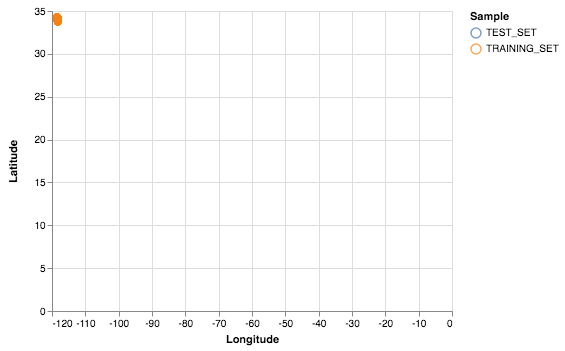

In [45]:
plt.figure(figsize=(20,20))
alt.Chart(testTrainComp).mark_point().encode(
    x='Longitude',
    y='Latitude',
    color='Description',
    tooltip=['Description','Day', 'Time']
).interactive()